In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [157]:
df = pd.read_csv('Mall_Customers.csv')

df.drop('CustomerID', 1, inplace=True)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [158]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


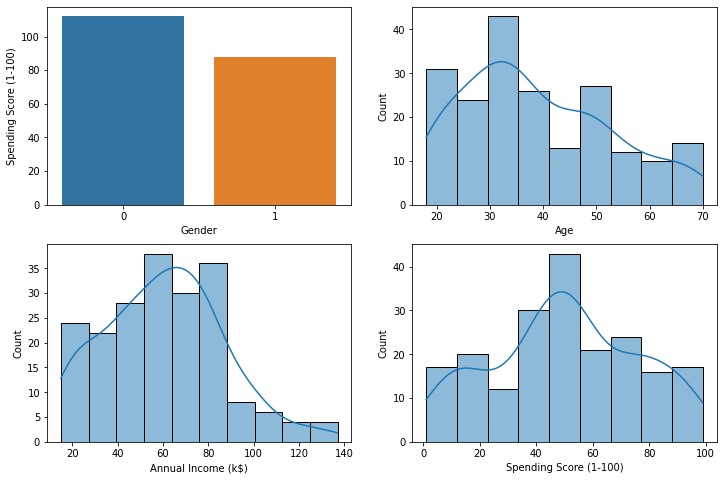

In [159]:
f, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.barplot(data=df.groupby('Gender').count().reset_index()[['Gender', 'Spending Score (1-100)']], 
             x='Gender', 
             y='Spending Score (1-100)',
             ax=axes[0, 0])
sns.histplot(data=df, x='Age', kde=True, ax=axes[0, 1])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, ax=axes[1, 0])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, ax=axes[1, 1])
plt.show()

In [160]:
data = StandardScaler().fit_transform(df)

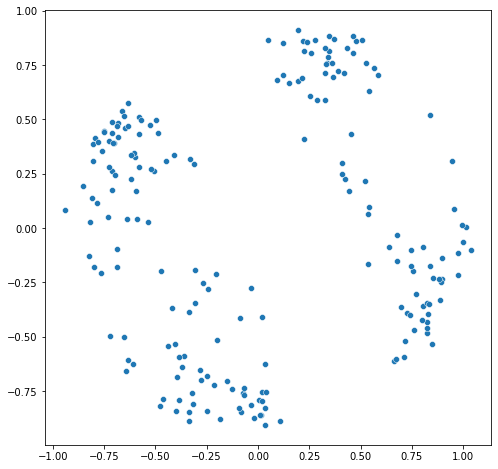

In [161]:
fig, ax = plt.subplots(figsize=(8, 8))
model = model = KernelPCA(n_components=2, random_state=0, n_jobs=-1, kernel='cosine')
data2D = model.fit_transform(data)
sns.scatterplot(x=data2D[:, 0], y=data2D[:, 1], ax=ax)
plt.show()

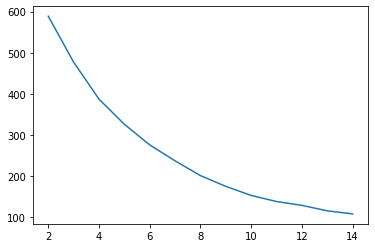

In [162]:
elbow = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
    elbow.append(kmeans.inertia_)
sns.lineplot(x=range(2, 15), y=elbow)
plt.show()

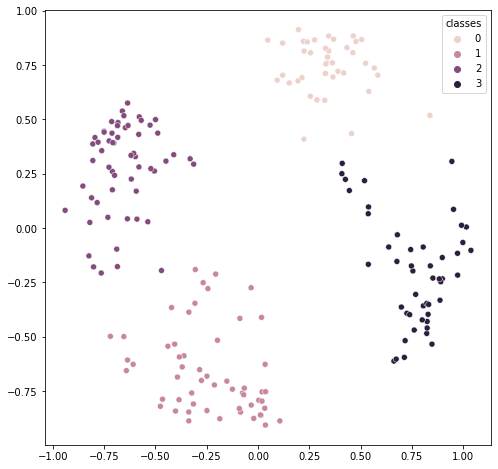

In [163]:
fig, ax = plt.subplots(figsize=(8, 8))
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
df['classes'] = kmeans.predict(data)
centroids = model.transform(kmeans.cluster_centers_)
sns.scatterplot(x=data2D[:, 0], y=data2D[:, 1], hue=df['classes'], legend="full", ax=ax)
plt.show()

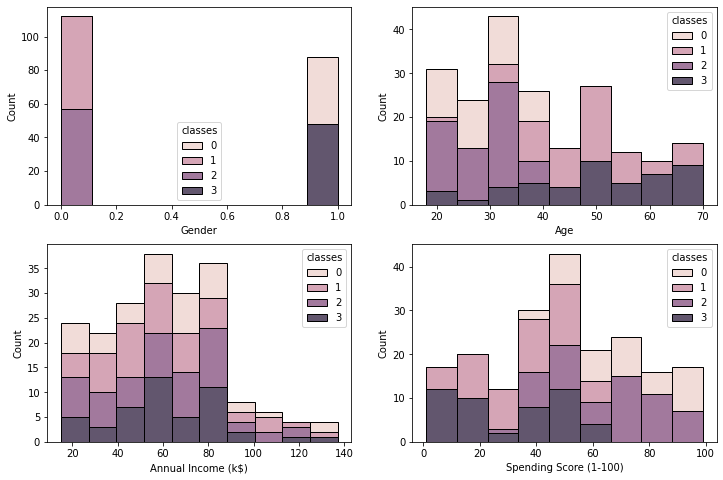

In [167]:
f, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(data=df, x="Gender", hue="classes", multiple="stack", ax=axes[0, 0])
sns.histplot(data=df, x="Age", hue="classes", multiple="stack", ax=axes[0, 1])
sns.histplot(data=df, x="Annual Income (k$)", hue="classes", multiple="stack", ax=axes[1, 0])
sns.histplot(data=df, x="Spending Score (1-100)", hue="classes", multiple="stack", ax=axes[1, 1])
plt.show()